In [23]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
torch.cuda.is_available()

True

In [25]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [26]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [27]:
agg_results_data = get_all_results(True)

In [28]:
agg_results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dataset             19 non-null     object 
 1   model_name          19 non-null     object 
 2   max_train_accuracy  19 non-null     float64
 3   max_test_accuracy   19 non-null     float64
 4   epochs              19 non-null     float64
 5   execution_time      19 non-null     float64
 6   time_per_epoch      19 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.2+ KB


In [29]:
agg_results_data

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
0,articularywordrecognition,FullyConvolutionalNetwork1D,0.998043,0.995652,5000.00,72.692681,0.014539
1,articularywordrecognition,FullyConvolutionalNetwork1DLate,0.999565,1.000000,159.70,28.047982,0.189228
2,atrialfibrillation,FullyConvolutionalNetwork1D,1.000000,0.433333,5000.00,15.365478,0.003073
3,atrialfibrillation,MultiLayerPerceptron,1.000000,0.516667,5000.00,7.680521,0.001536
4,basicmotions,FullyConvolutionalNetwork1D,1.000000,1.000000,5000.00,0.058370,0.000012
5,basicmotions,FullyConvolutionalNetwork1DLate,1.000000,1.000000,4.00,0.093952,0.023524
6,basicmotions,MultiLayerPerceptron,0.987500,0.918750,5000.00,11.948030,0.002390
7,cricket,FullyConvolutionalNetwork1D,0.981944,1.000000,5000.00,0.430476,0.000086
8,cricket,FullyConvolutionalNetwork1DLate,0.988194,1.000000,6.70,0.741862,0.108058
9,cricket,MultiLayerPerceptron,0.994444,0.975000,5000.00,16.067394,0.003213


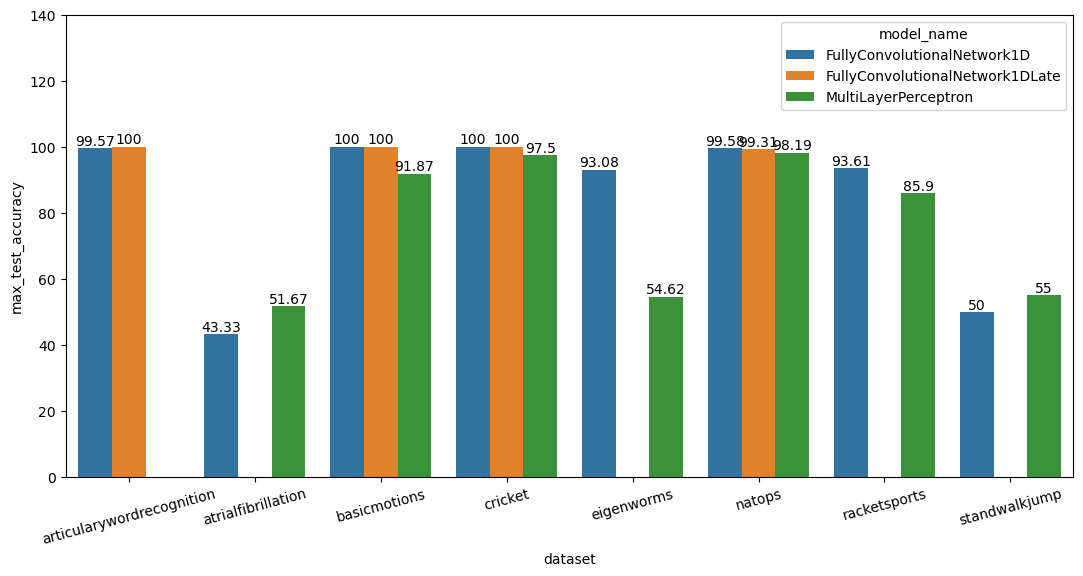

In [30]:
plt.figure(figsize = (13,6))
ax = sns.barplot(
    data = agg_results_data, 
    x = 'dataset', 
    y = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 4)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.ylim([0, 100*1.4])
plt.show()

In [9]:
from modality_info import modalities

In [10]:
modalities.items()

dict_items([('BasicMotions', {1: [0, 1, 2, 3], 2: [4, 5]})])

In [11]:
# class FullyConvolutionalNetwork1DLate_test(nn.Module):

#     def __init__(self, *args, **kwargs) -> None:
#         super().__init__(*args, **kwargs)

#         self.modalities = nn.ModuleDict()
        
#         # Define sub-networks for each modality
#         for i, input_shape in enumerate(2):
#             self.modalities[f"modality_{i}"] = nn.Sequential(
#                 nn.Conv1d(in_channels=input_shape[1], out_channels=128, kernel_size=8),
#                 nn.ReLU(),
#                 nn.BatchNorm1d(128),
#                 nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5),
#                 nn.ReLU(),
#                 nn.BatchNorm1d(256),
#                 nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3),
#                 nn.ReLU(),
#                 nn.BatchNorm1d(128),
#                 nn.AdaptiveAvgPool1d(output_size=1),
#                 nn.Flatten()
#             )


#         self.pooling_layer = nn.AdaptiveAvgPool1d(output_size=1)
#         # self.fusion_conv = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3)  # Adjust dimensions as needed
#         self.final_fc = nn.Linear(in_features=128, out_features=6)



#     def forward(self, x):

#         out_network1 = self.network1(x[0])
#         out_network2 = self.network2(x[1])

        

#         return out_network1.shape, out_network2.shape




    

In [12]:
# test_model = FullyConvolutionalNetwork1DLate_test()

torch.manual_seed(42)
simulated_multi_modal = torch.rand(size = (64, 6, 100))
modality1 = simulated_multi_modal[:, 0:3, :]
modality2 = simulated_multi_modal[:, 3:, :]
all_modalities = torch.stack([modality1, modality2])

In [13]:
all_modalities.shape

torch.Size([2, 64, 3, 100])